<a href="https://colab.research.google.com/github/Barleysack/tensor101/blob/master/MLP_tutorial_sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import keras
import matplotlib.pyplot as plt
import pandas as pd
housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

#데이터셋 받아오고, 랜덤 훈련세트 설정.
#사이킷런을 제대로 익히지 못했지만, 특성의 스케일 조정하는 듯.아. Thanks to Rickiepark

In [5]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
#잡음이 많은 데이터, 오버피팅 방지를 위해 계층수를 줄이고, 뉴런 수를 적게 하였다. 
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))
#평균제곱오차를 로스펑션으로 사용. 
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)


#잡음이 많은 데이터, 오버피팅 방지를 위해 계층수를 줄이고, 뉴런 수를 적게 하였다. 

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 2.7266 - val_loss: 1.6237
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.7972 - val_loss: 0.7155
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.7166 - val_loss: 0.7554
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6667 - val_loss: 0.6163
Epoch 5/20
363/363 [==============================] - 1s 1ms/step - loss: 0.6396 - val_loss: 0.6371
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5923 - val_loss: 0.5609
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5658 - val_loss: 0.5387
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5231 - val_loss: 0.5357
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5564 - val_loss: 0.4976
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5051 - val_loss: 0.4875

In [7]:
model.evaluate(X_test,y_test)
#예상대로 높지 않은 점수.

162/162 [==============================] - 0s 829us/step - loss: 0.4332


0.433195561170578

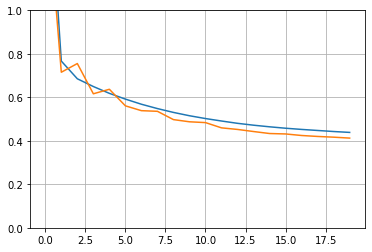

In [13]:

plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()